In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import datasets

In [304]:
# Load data
dataset = pd.read_csv('./datasets/train.csv')
dataset.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [305]:
# features and labels
X = dataset.iloc[:, 0:20].values
y = dataset.iloc[:, 20].values



# # Row normalization
# for i, x in enumerate(X):
#     minVal = np.min(x)
#     norm_x = x - minVal
#     maxVal = np.max(norm_x)
#     norm_x /= maxVal
#     X[i] = norm_x
    
# Column normalization
for i in range(X.shape[1]):
    x = X[:, i]
    minVal = np.min(x)
    norm_x = x - minVal
    maxVal = np.max(norm_x)
    norm_x /= maxVal
    X[:, i] = norm_x



## Clustering

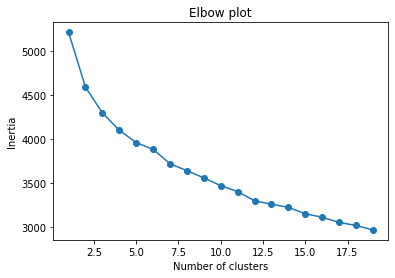

In [306]:
from sklearn.cluster import KMeans

X_l = list(X)

cluster_data=[]
for i in range(0,len(X_l)):
    cluster_data.append(list(X_l[i]))
    
    
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cluster_data)
    inertias.append(kmeans.inertia_)
    


    
plt.plot(range(1,20), inertias, marker='o')
plt.title('Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [307]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [308]:
dataset.shape

(2000, 21)

Number of clusters chosen to be two

In [309]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(cluster_data)

kmeans_store=kmeans.labels_


In [310]:
clusters=[0,1]
num_clusters=len(clusters)

## Training

In [311]:
cluster_partitions = [] # stores attributes of rows belonging to certain cluster in a dd list
cluster_indices = [] # stores indices of rows belonging to certain cluster in a dd list

for j in range(num_clusters):
    partition = []
    indices = []
    for i in range(X_train.shape[0]):
        if kmeans.labels_[i] == j:
            partition.append(X_train[i])
            indices.append(i)
    cluster_partitions.append(partition)
    cluster_indices.append(indices)

In [312]:
K_VALUES = [3,5,7,9,11,13,15]

# Finding best k per cluster
k_clusters = [0 for _ in range(num_clusters)]
for i in range(num_clusters):
    data = cluster_partitions[i]      # attribute rows belonging to cluster i
    label = clusters[i]
    most_count = [0 for _ in range(len(K_VALUES))]
    
    match = 0
    for test_point_index, test_point in enumerate(data):
        distances_dict = Counter()
        cluster_count = Counter()

        for index, train_point in enumerate(X_train):
            distances_dict[index] = np.sum(np.square(test_point - train_point))

        matched_k_list = []
        index = 0
        for K in K_VALUES:
            for point_index, point in distances_dict.most_common()[-(K + 1):-1]:
                cluster_count[y_train[point_index]] += 1

            if cluster_count.most_common(1)[0][0] == y_train[test_point_index]:
                matched_k_list.append(K)
                most_count[index] += 1
            index += 1

        
    # Taking the first best k value in case of ties
    maxpos = most_count.index(max(most_count))
    #print(most_count)

    k_clusters[i] = K_VALUES[maxpos]               # ideal k value for the cluster
    


## Testing

In [314]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

test_iter = list(X_test)

final_acc = 0

total = len(X_test)



for j in clusters:
    index = len(X_train)
    num = 0
    test_points_in_cluster=[]
    test_y_in_cluster=[]
    for i in test_iter:
        if(kmeans_store[index] == j):     # check which test points belong to current cluster
            test_points_in_cluster.append(i)
            test_y_in_cluster.append(y[index])
            num += 1
        index += 1

    classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    test_points_in_cluster = np.array(test_points_in_cluster)
    test_y_in_cluster = np.array(test_y_in_cluster)

    
    #y_pred = classifier.predict(test_points_in_cluster)
    

    
    y_pred = classifier.predict(test_points_in_cluster)
    


    
    ac = accuracy_score(test_y_in_cluster, y_pred)
    #print(ac)
    final_acc += (num / total) * ac  # create a separate model for each cluster and take a frequency weighted average in the end
    
print("Final Accuracy is", final_acc)

Final Accuracy is 0.4125000000000001
